In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DataSetGen import generate_cluster_data, load_fund_data_as_numpy
from ReinforcementClustering import reinforcement_clustering
import pickle
from datetime import datetime
from Env import ClusteringEnvNumpy

# For Clustering

In [2]:
# # Example synthetic data

# N = 100 # number of nodes
# K = 4 # number of clusters
# P = 0.1 # cluster varience

# X = generate_cluster_data(N, K, P, random_seed=1)


# For Funding Data

In [3]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# X = load_fund_data_as_numpy('StrategicMutualFunds.xlsx')
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)
# print(X_pca.shape)

# D_31.txt

In [4]:
# X = np.loadtxt("D31.txt")[:,:2]
# plt.scatter(X[:,0],X[:,1])

In [5]:
from TestCaseGenerator import data_RLClustering
X, M, T_P, N, d = data_RLClustering(4)

env = ClusteringEnvNumpy(N, M, d, parametrized=False, T_p=T_P)

In [6]:
beta_min = 1e-1
beta_max = 1e6
tau = 1.5

pi_star_list, Y_list = reinforcement_clustering(
    beta_min,
    beta_max,
    tau,
    M,
    X,
    env,
    episodes=100,
    GD_iter=100,
    tol=1e-4,
    perturbation=0.01,
)
Y_final = Y_list[-1]
pi_star = pi_star_list[-1]

Beta: 1.000e-01
Beta: 1.500e-01
Beta: 2.250e-01
Beta: 3.375e-01
Beta: 5.063e-01
Beta: 7.594e-01
Beta: 1.139e+00
Beta: 1.709e+00
Beta: 2.563e+00
Beta: 3.844e+00
Beta: 5.767e+00
Beta: 8.650e+00
Beta: 1.297e+01
Beta: 1.946e+01
Beta: 2.919e+01
Beta: 4.379e+01
Beta: 6.568e+01
Beta: 9.853e+01
Beta: 1.478e+02
Beta: 2.217e+02
Beta: 3.325e+02
Beta: 4.988e+02
Beta: 7.482e+02
Beta: 1.122e+03
Beta: 1.683e+03
Beta: 2.525e+03
Beta: 3.788e+03
Beta: 5.682e+03
Beta: 8.522e+03
Beta: 1.278e+04
Beta: 1.918e+04
Beta: 2.876e+04
Beta: 4.314e+04
Beta: 6.472e+04
Beta: 9.707e+04
Beta: 1.456e+05
Beta: 2.184e+05
Beta: 3.276e+05
Beta: 4.914e+05
Beta: 7.372e+05


# Plotting The Results

In [8]:
scenario_name = f"{N},{M},{beta_min},{beta_max},{tau},idx4_p_para_gamma_10,{datetime.now().strftime('%Y%m%d_%H%M%S')}"


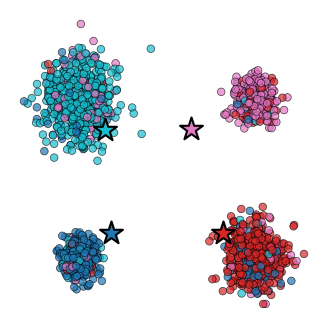

In [ ]:
from Plotter import PlotClustering
PlotClustering(X, Y_final, pi_star, save_path=f"Results/{scenario_name}_final.png")

# Save Data

In [ ]:

save_dict = {
    "N": N,
    "M": M,
    "beta_min": beta_min,
    "beta_max": beta_max,
    "tau": tau,
    "X": X,
    "T_P": T_P,
    "Y_list": Y_list,
    "pi_star_list": pi_star_list,
}
with open(f"Results/{scenario_name}_results.pkl", "wb") as f:
    pickle.dump(save_dict, f)

# Load Data

In [ ]:

with open(f"Results/{scenario_name}_results.pkl", "rb") as f:
    loaded_dict = pickle.load(f)

N = loaded_dict["N"]
M = loaded_dict["M"]
beta_min = loaded_dict["beta_min"]
beta_max = loaded_dict["beta_max"]
tau = loaded_dict["tau"]
X = loaded_dict["X"]
T_P = loaded_dict["T_P"]
Y_list = loaded_dict["Y_list"]
pi_star_list = loaded_dict["pi_star_list"]



In [9]:
from animator import animate_Clusters
pi_star_list[0] = pi_star_list[1]
animate_Clusters(X, Y_list, pi_star_list, interval=400, save_path=f"Results/{scenario_name}_animation.gif")